In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
import nltk

import re
import os
import json

import gensim
import networkx

In [188]:
nlp = spacy.load("en_core_web_lg")

In [189]:
def extract_specific_text(aspect):
    storage = {'ADJ': [],
               'VERB': [],
               'OTHER': [],}
    for i, d in data.items():
        for a in d.keys():
            if a == aspect:
                for label, item in d[a].items():
                    texts = []
                    for element in item:
                        text = element[1]
                        if text not in texts:
                            texts.append(text)
                    if len(texts) > 0:
                        storage[label].append(' '.join(texts))
    return storage

In [190]:
def extract_all_docs(data):
    storage = []
    for idx in range(len(data)):
        texts = []
        for a in data[str(idx)].values():
            for i in a.values():
                for j in i:
                    if j[1] not in texts:
                        texts.append(j[1])
        storage.append(' '.join(texts))
        
    return storage

In [191]:
# Load JSON data from a file
with open('data-1.json', 'r') as json_file:
    data = json.load(json_file)

data

{'0': {'staff': {'ADJ': [[['helpful'], 'staff were helpful.'],
    [['patient'], 'staff were patient.']],
   'VERB': [],
   'OTHER': []}},
 '1': {'process': {'ADJ': [[['smooth'], 'process was smooth.'],
    [['quick'], 'process was quick.']],
   'VERB': [],
   'OTHER': []}},
 '2': {'selection': {'ADJ': [[['amazing'], 'selection is amazing.']],
   'VERB': [],
   'OTHER': []},
  'price': {'ADJ': [[['competitive'], 'price are competitive.']],
   'VERB': [],
   'OTHER': []}},
 '3': {'staff': {'ADJ': [],
   'VERB': [[['appreciate', 'walk'], 'I appreciate walked me.'],
    [['appreciate', 'walk'],
     'I appreciate walked through setting new device.']],
   'OTHER': []}},
 '4': {'question': {'ADJ': [],
   'VERB': [[['answer'], 'question answered.']],
   'OTHER': []}},
 '5': {'staff': {'ADJ': [],
   'VERB': [[['resist'], 'I could not resist upgrading.'],
    [['resist', 'offer'],
     'I could not resist offer amazing deals on phones.']],
   'OTHER': []}},
 '6': {'phones issue': {'ADJ': [],
 

In [192]:
# example = "Krakatoa, a volcanic island located in Indonesia, is infamous for its cataclysmic eruption in 1883,"+\
#   " which is considered one of the most violent volcanic events"+\
#   " in recorded history. The eruption unleashed a series of powerful explosions, "+\
#   "with the loudest heard over 3,000 miles away, and produced massive tsunamis that devastated nearby coastal regions."+\
#   " The explosion ejected vast amounts of ash and debris into the atmosphere, causing dramatic global climate changes, "+\
#   "including a drop in temperatures and vivid sunsets for months. The eruption destroyed much of the island, leaving behind a submerged caldera,"+\
#   " from which a new island, Anak Krakatoa ('Child of Krakatoa'), emerged in 1927. Today, Krakatoa remains an active volcano, a reminder of nature's immense power."


# print(example)

In [193]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_text(text):
    doc = nlp(text)

    result = [
                [token.lemma_.lower() for token in sent if (token.lemma_ not in stop_words 
                                                and 
                                                not re.match(r'^[0-9\W]+$', token.lemma_)
                                                and
                                                len(token.lemma_) >= 3)
                ]
                 for sent in doc.sents]
    return result

# norm_corpus = normalize_text(example)

In [194]:
def normalize_corpus(corpus):
    result = []
    for sentence in corpus:
        doc = nlp(sentence)
        result.append([token.lemma_.lower() for token in doc if (token.lemma_ not in stop_words
                                                                and
                                                                not re.match(r'^[0-9\W]+$', token.lemma_)
                                                                and
                                                                len(token.lemma_) >= 3)

                      ])
    return result

corpus = extract_all_docs(data)
norm_corpus = normalize_corpus(corpus)
print(len(norm_corpus))
norm_corpus

99


[['staff', 'helpful', 'staff', 'patient'],
 ['process', 'smooth', 'process', 'quick'],
 ['selection', 'amazing', 'price', 'competitive'],
 ['appreciate', 'walk', 'appreciate', 'walk', 'set', 'new', 'device'],
 ['question', 'answer'],
 ['could',
  'resist',
  'upgrading',
  'could',
  'resist',
  'offer',
  'amazing',
  'deal',
  'phone'],
 ['technician', 'fix', 'phone', 'issue', 'technician', 'fix', 'fast'],
 ['experience', 'really', 'know', 'stuff'],
 ['variety', 'impressive'],
 [],
 ['staff', 'knowledgeable'],
 ['price', 'reasonable'],
 ['staff', 'really', 'mile'],
 ['service', 'excellent'],
 ['deal', 'friendly', 'staff', 'friendly'],
 ['buy', 'experience', 'fix', 'experience'],
 ['get', 'good', 'deal', 'old', 'phone'],
 ['service', 'quick', 'service', 'reliable'],
 ['staff', 'helpful', 'set', 'phone'],
 ['satisfied'],
 ['staff', 'patient', 'question', 'variety', 'patient', 'question'],
 ['process', 'simple'],
 ['help', 'choose', 'within', 'budget', 'help', 'choose', 'phone'],
 ['pho

In [195]:
def tfidf_modeling(corpus):
    # Create dictionary
    dictionary = gensim.corpora.Dictionary(corpus)
    # Transforming corpus into bag of words
    bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]
    # Generate TF-IDF model
    tfidf = gensim.models.TfidfModel(bow_corpus)

    return tfidf, dictionary

def tfidf_predict(model, dictionary, token_doc):
    # Transforming into bag of words
    bow_doc = dictionary.doc2bow(word_tokenize)
    # Calculate tfidf
    tfidf_doc = tfidf[bow_corpus]

    return tfidf_corpus

def tfidf_corpus_gen(model, dictionary, corpus):
    # Transforming corpus into bag of words
    bow_corpus = [dictionary.doc2bow(text) for text in corpus]

    # Generate tfidf corpus
    tfidf_corpus = [tfidf[doc] for doc in bow_corpus]

    return tfidf_corpus

In [196]:
# Text vectorization

# # Create dictionary representation of the documents
# dictionary = gensim.corpora.Dictionary(norm_corpus)

# # Transforming corpus into bag of words
# bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus]

# # Generate TF-IDF model and create TFIDF corpus
# tfidf = gensim.models.TfidfModel(bow_corpus)

# corpus = extract_all_docs(data)

tfidf, dictionary = tfidf_modeling(norm_corpus)
# tfidf_corpus = [tfidf[doc] for doc in bow_corpus]
tfidf_corpus = tfidf_corpus_gen(tfidf, dictionary, norm_corpus)

# Generate term-document matrix
td_matrix = gensim.matutils.corpus2dense(corpus=tfidf_corpus,
                             num_terms=len(dictionary))

print(td_matrix.shape)

td_frame = pd.DataFrame(td_matrix, columns=range(0, td_matrix.shape[-1]), index=dictionary.values())
print(td_frame.shape)
td_frame.head()

(177, 99)
(177, 99)


,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
helpful,0.590009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
patient,0.590009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
staff,0.551162,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.158057,0.0,0.0,0.0,0.0,0.0,0.0
process,0.000000,0.812236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
quick,0.000000,0.333975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Latent Semantic Analysis Approximation**

In [197]:
# Singular Value Decomposition

from scipy.sparse.linalg import svds

def low_rank_svd(matrix, singular_count=None):
    if not singular_count:
        singular_count = min(matrix.shape) - 1
    u, s, vt = svds(matrix, k=singular_count)
    return u, s ,vt


term_topic_mat, singular_values, topic_document_mat = low_rank_svd(td_matrix, 10)
print(term_topic_mat.shape, singular_values.shape, topic_document_mat.shape)

(177, 10) (10,) (10, 99)


In [198]:
# remove singular values below threshold
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [199]:
salience_scores = np.sqrt(np.dot(np.square(singular_values),
                                 np.square(topic_document_mat)))

print(len(salience_scores))
salience_scores

99


array([7.43203044e-01, 6.31713510e-01, 7.89873540e-01, 3.09830546e-01,
       3.06152701e-01, 2.56616443e-01, 6.01752102e-01, 7.67275751e-01,
       3.55499208e-01, 7.91579495e-08, 4.21429336e-01, 4.94658768e-01,
       5.07071555e-01, 8.21760833e-01, 3.39869320e-01, 7.22753346e-01,
       7.42307365e-01, 8.55040729e-01, 7.02309191e-01, 1.91499169e-07,
       5.69626510e-01, 4.74310458e-01, 3.71202052e-01, 5.30313849e-01,
       4.97264922e-01, 5.88776410e-01, 4.89032179e-01, 6.06035292e-01,
       6.94696903e-01, 4.21429336e-01, 8.18031430e-01, 7.79071598e-08,
       7.30118752e-01, 2.96867970e-08, 2.66709477e-01, 3.52380335e-01,
       5.36955357e-01, 4.97264892e-01, 1.75127611e-01, 5.38608074e-01,
       2.94743121e-01, 7.75888562e-02, 9.17436481e-02, 4.11143048e-08,
       4.21429306e-01, 5.95870793e-01, 7.55652606e-01, 6.39744759e-01,
       5.37117362e-01, 6.88057542e-01, 3.21296424e-01, 2.03376383e-01,
       6.99782372e-01, 5.38496263e-02, 5.88776529e-01, 7.65149176e-01,
      

In [200]:
thres = np.percentile(salience_scores, 30)
print(thres)
idx_small_ss = [idx for idx, ss in enumerate(salience_scores) if ss < thres]
print(len(idx_small_ss))
idx_small_ss

0.2579992949962616
30


[5,
 9,
 19,
 31,
 33,
 38,
 41,
 42,
 43,
 51,
 53,
 60,
 67,
 70,
 71,
 72,
 73,
 74,
 79,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 90,
 95,
 96,
 98]

In [201]:
for i in idx_small_ss:
    print(i, corpus[i])

5 I could not resist upgrading. I could not resist offer amazing deals on phones.
9 
19 I m satisfied.
31 
33 
38 they not fail recommend to friends. they not fail recommend store. they not fail recommend to family.
41 plan is worth.
42 I appreciate were able. they were able.
43 
51 they offer discounts. they offer fantastic promotions.
53 they resolved professionally. they resolved very quickly. they resolved issue.
60 
67 they did not inform me. they did not inform of hidden fees. I bought phone.
70 they twice gave refund. I had to return faulty phone.
71 I very disorganized waited forever.
72 
73 they refused to honor promotion.
74 I felt pressured.
79 they upsold on phone plan. they upsold me.
81 policy is awful.
82 they did not apply discount.
85 they kept trying.
86 job was incomplete.
87 representative were rude on phone.
88 I had to call multiple times.
89 they rushed me. they did not explain anything. they did not explain clearly. they rushed through purchase.
90 support is no

In [202]:
num_sentences = 10

top_sentence_indices = list((-salience_scores).argsort()[:num_sentences])
# Make sure the position of selected ranked of sentence is ordered as the real text.
top_sentence_indices.sort()
top_sentence_indices

[0, 2, 7, 13, 16, 17, 30, 46, 55, 92]

In [203]:
# doc = nlp(example)

# sentences = [sent.text for sent in doc.sents]
sentences = corpus.copy()
print("Before:")
print('\n\n'.join(sentences))
print()
print("After:")
sentences = np.array(sentences)[top_sentence_indices]
print('\n\n'.join(sentences))

Before:
staff were helpful. staff were patient.

process was smooth. process was quick.

selection is amazing. price are competitive.

I appreciate walked me. I appreciate walked through setting new device.

question answered.

I could not resist upgrading. I could not resist offer amazing deals on phones.

technician fixed phones issue. technician fixed faster.

experience really know stuff.

variety was impressive.



staff was knowledgeable.

price were reasonable.

staff really went mile.

service be excellent.

deal was friendly. staff was friendly.

buying be experience. fixing be experience.

I got good deal on old phone.

service are quick. service are reliable.

staff was helpful in setting phone.

I m satisfied.

staff was patient with questions. variety was patient with questions.

process was simple.

they helped choose within budget. they helped choose phone.

phone was fixed in minutes.

service is outstanding.

store hands.

staff made.

I found needed what. they helped 

**TextRank Approximation**

In [204]:
np.matmul(td_matrix.T, td_matrix).shape

(99, 99)

In [205]:
# Document based similarity matrix

dt_matrix = td_matrix.T
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [206]:
# Create similarity graph from document based similarity matrix

similarity_graph = networkx.from_numpy_array(similarity_matrix)

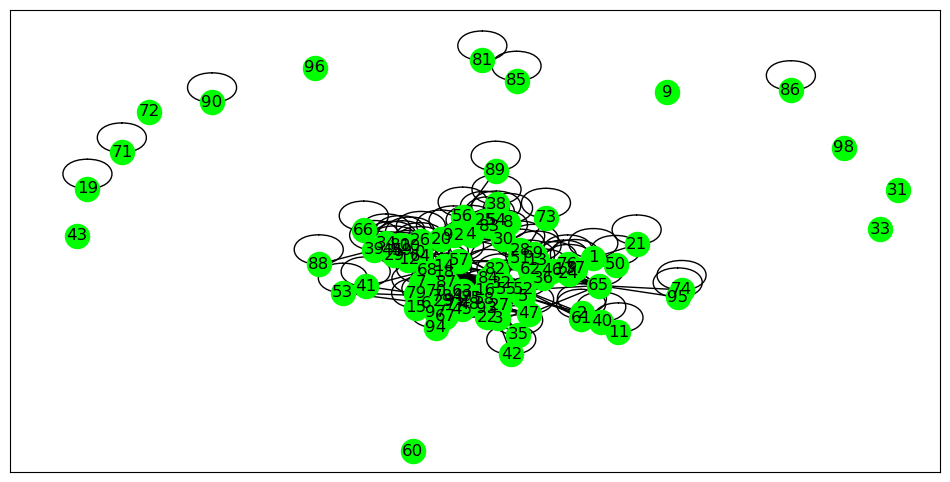

In [207]:
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [208]:
# Calculate pagerank algorithm

scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(
                    ((score, index) for index, score in scores.items()),
                    reverse=True)
ranked_sentences[:10]

[(0.01849938374721885, 52),
 (0.017622191675776704, 17),
 (0.017181983663847454, 28),
 (0.017152798430902325, 18),
 (0.01596529997334552, 68),
 (0.015869208629096958, 0),
 (0.015209946256231914, 64),
 (0.0148217129202644, 92),
 (0.014768114056612904, 46),
 (0.014744629282775777, 13)]

In [209]:
# num_sentences = 
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()
top_sentence_indices

[0, 13, 17, 18, 28, 46, 52, 64, 68, 92]

In [210]:
# doc = nlp(example)

# sentences = [sent.text for sent in doc.sents]
sentences = corpus.copy()
print("Before:")
print('\n\n'.join(sentences))
print()
print("After:")
sentences = np.array(sentences)[top_sentence_indices]
print('\n\n'.join(sentences))

Before:
staff were helpful. staff were patient.

process was smooth. process was quick.

selection is amazing. price are competitive.

I appreciate walked me. I appreciate walked through setting new device.

question answered.

I could not resist upgrading. I could not resist offer amazing deals on phones.

technician fixed phones issue. technician fixed faster.

experience really know stuff.

variety was impressive.



staff was knowledgeable.

price were reasonable.

staff really went mile.

service be excellent.

deal was friendly. staff was friendly.

buying be experience. fixing be experience.

I got good deal on old phone.

service are quick. service are reliable.

staff was helpful in setting phone.

I m satisfied.

staff was patient with questions. variety was patient with questions.

process was simple.

they helped choose within budget. they helped choose phone.

phone was fixed in minutes.

service is outstanding.

store hands.

staff made.

I found needed what. they helped 

**Testing with specific Text**

In [211]:
extract_specific_text('staff')

{'ADJ': ['staff were helpful. staff were patient.',
  'staff was knowledgeable.',
  'staff was friendly.',
  'staff was helpful in setting phone.',
  'staff was patient with questions.',
  'staff was informative.',
  'staff are ready.',
  'staff was accommodating.',
  'this is reliable.',
  'staff was not apologetic.',
  'staff was rude. staff was unhelpful.',
  'staff was unprofessional.'],
 'VERB': ['I appreciate walked me. I appreciate walked through setting new device.',
  'I could not resist upgrading. I could not resist offer amazing deals on phones.',
  'staff really went mile.',
  'I got good deal on old phone.',
  'I m satisfied.',
  'staff made.',
  'I found needed what.',
  'staff took time.',
  'I appreciate were able.',
  'I had great experience with program.',
  'I made right purchase. I always leave store.',
  'I had took too long. I had took way.',
  'I bought phone.',
  'staff seemed. staff gave incorrect information about phone plan.',
  'I had to return faulty phone.

In [212]:
# sample = "they even helped transfer without extra charge. they even helped transfer data. they even helped transfer contacts."
sample = extract_specific_text('staff')['VERB']
# sample = ' '.join(sample['VERB'])
# new_corpus = normalize_text(sample)
new_corpus = normalize_corpus(sample)
new_corpus

[['appreciate', 'walk', 'appreciate', 'walk', 'set', 'new', 'device'],
 ['could',
  'resist',
  'upgrading',
  'could',
  'resist',
  'offer',
  'amazing',
  'deal',
  'phone'],
 ['staff', 'really', 'mile'],
 ['get', 'good', 'deal', 'old', 'phone'],
 ['satisfied'],
 ['staff', 'make'],
 ['find', 'need'],
 ['staff', 'take', 'time'],
 ['appreciate', 'able'],
 ['great', 'experience', 'program'],
 ['make', 'right', 'purchase', 'always', 'leave', 'store'],
 ['take', 'long', 'take', 'way'],
 ['buy', 'phone'],
 ['staff',
  'seem',
  'staff',
  'give',
  'incorrect',
  'information',
  'phone',
  'plan'],
 ['return', 'faulty', 'phone'],
 ['disorganized', 'wait', 'forever'],
 ['feel', 'pressured'],
 ['call', 'multiple', 'time'],
 ['feel', 'overcharge']]

In [213]:
new_tfidf_corpus = tfidf_corpus_gen(tfidf, dictionary, new_corpus)

new_tfidf_corpus

[[(10, 0.5603944049659603),
  (11, 0.3299714877864785),
  (12, 0.28019720248298013),
  (13, 0.25108111208023737),
  (14, 0.659942975572957)],
 [(6, 0.23129223835321855),
  (17, 0.6079297910588112),
  (18, 0.19750137708607993),
  (19, 0.25811355384585094),
  (20, 0.0965535106555064),
  (21, 0.6079297910588112),
  (22, 0.3039648955294056)],
 [(2, 0.3009989872611521), (29, 0.5774635169979468), (35, 0.7589041416438066)],
 [(18, 0.39681940007584704),
  (20, 0.19399513430651102),
  (40, 0.46471193578322056),
  (41, 0.46471193578322056),
  (42, 0.6107257036264868)],
 [(44, 1.0)],
 [(2, 0.4231925333114923), (54, 0.9060397782379102)],
 [(55, 0.7071067811865475), (57, 0.7071067811865475)],
 [(2, 0.31361294809665863),
  (73, 0.6714338831136402),
  (74, 0.6714338831136402)],
 [(10, 0.6472747587115051), (78, 0.762256772180453)],
 [(27, 0.5179797665790972),
  (56, 0.5179797665790972),
  (80, 0.6807304333062597)],
 [(53, 0.25141100169464076),
  (54, 0.3899540152434863),
  (102, 0.45922552201790895),


In [214]:
# Generate term-document matrix
new_td_matrix = gensim.matutils.corpus2dense(corpus=new_tfidf_corpus,
                             num_terms=len(dictionary))

print(new_td_matrix.shape)

td_frame = pd.DataFrame(new_td_matrix, columns=range(0, new_td_matrix.shape[-1]), 
                        index=dictionary.values())
print(td_frame.shape)
td_frame.head()

(177, 19)
(177, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
helpful,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
patient,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
staff,0.0,0.0,0.300999,0.0,0.0,0.423193,0.0,0.313613,0.0,0.0,0.0,0.0,0.0,0.369484,0.0,0.0,0.0,0.0,0.0
process,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
quick,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [215]:
new_term_topic_mat, new_singular_values, new_topic_document_mat = low_rank_svd(new_td_matrix, 9)
print(new_term_topic_mat.shape, new_singular_values.shape, new_topic_document_mat.shape)

(177, 9) (9,) (9, 19)


In [216]:
# remove singular values below threshold
sv_threshold = 0.5
min_sigma_value = max(new_singular_values) * sv_threshold
new_singular_values[new_singular_values < min_sigma_value] = 0

In [217]:
salience_scores = np.sqrt(np.dot(np.square(new_singular_values),
                                 np.square(new_topic_document_mat)))
salience_scores

array([0.8254479 , 0.7905756 , 0.75581235, 0.7040365 , 0.37822217,
       0.83332366, 0.5893746 , 0.9093735 , 0.82544786, 0.8281236 ,
       0.86734295, 0.7949556 , 0.6937636 , 0.7265803 , 0.7421786 ,
       0.8174454 , 0.8266459 , 0.5976143 , 0.8266459 ], dtype=float32)

In [218]:
# num_sentences = 2

# top_sentence_indices = list((-salience_scores).argsort()[:num_sentences])
# # Make sure the position of selected ranked of sentence is ordered as the real text.
# top_sentence_indices.sort()
# top_sentence_indices

In [219]:
# thres = np.percentile(salience_scores, 0.3)
thres = np.median(salience_scores)
top_sentence_indices = []
for i, s in enumerate(salience_scores):
    if s > thres:
        print(i, s)
        top_sentence_indices.append(i)

top_sentence_indices

0 0.8254479
5 0.83332366
7 0.9093735
8 0.82544786
9 0.8281236
10 0.86734295
15 0.8174454
16 0.8266459
18 0.8266459


[0, 5, 7, 8, 9, 10, 15, 16, 18]

In [220]:
# doc = nlp(sample)

# sentences = [sent.text for sent in doc.sents]
# sentences = corpus.copy()
sentences = sample.copy()
print("Before:")
print('\n\n'.join(sentences))
print()
print("After:")
sentences = np.array(sentences)[top_sentence_indices]
print('\n\n'.join(sentences))

Before:
I appreciate walked me. I appreciate walked through setting new device.

I could not resist upgrading. I could not resist offer amazing deals on phones.

staff really went mile.

I got good deal on old phone.

I m satisfied.

staff made.

I found needed what.

staff took time.

I appreciate were able.

I had great experience with program.

I made right purchase. I always leave store.

I had took too long. I had took way.

I bought phone.

staff seemed. staff gave incorrect information about phone plan.

I had to return faulty phone.

I very disorganized waited forever.

I felt pressured.

I had to call multiple times.

I felt overcharged.

After:
I appreciate walked me. I appreciate walked through setting new device.

staff made.

staff took time.

I appreciate were able.

I had great experience with program.

I made right purchase. I always leave store.

I very disorganized waited forever.

I felt pressured.

I felt overcharged.


**Testing with Specific Text (using TextRank)**

In [221]:
# Document based similarity matrix

new_dt_matrix = new_td_matrix.T
similarity_matrix = np.matmul(new_dt_matrix, new_dt_matrix.T)
print(similarity_matrix.shape)
similarity_matrix

(19, 19)


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.36272913, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.09710329, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03382875, 0.01428565, 0.0227218 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.12738052, 0.        , 0.09439718, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11121427, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09710329, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.06796867, 0.02870271, 0.04565259,
        0.   

In [222]:
# Create similarity graph from document based similarity matrix

new_similarity_graph = networkx.from_numpy_array(similarity_matrix)

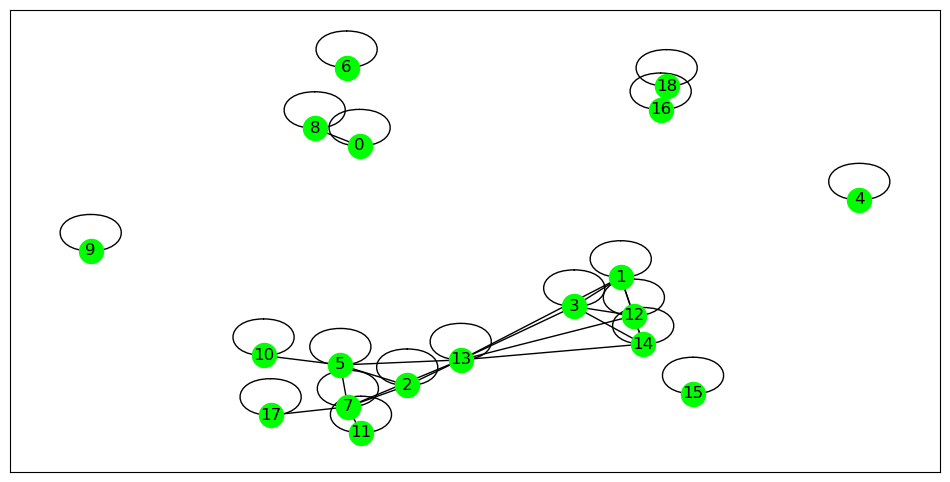

In [223]:
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(new_similarity_graph, node_color='lime')

In [224]:
# Calculate pagerank algorithm

scores = networkx.pagerank(new_similarity_graph)
ranked_sentences = sorted(
                    ((score, index) for index, score in scores.items()),
                    reverse=True)
ranked_sentences

[(0.06917998097226855, 7),
 (0.0590530970798792, 5),
 (0.0535315448263691, 13),
 (0.05263157894736842, 18),
 (0.05263157894736842, 16),
 (0.05263157894736842, 15),
 (0.05263157894736842, 9),
 (0.05263157894736842, 8),
 (0.05263157894736842, 6),
 (0.05263157894736842, 4),
 (0.05263157894736842, 0),
 (0.052277509699867705, 3),
 (0.05167238626158033, 12),
 (0.05082347150521123, 1),
 (0.05069163037506118, 14),
 (0.04937313839190183, 11),
 (0.0481697029739734, 10),
 (0.04788837861586266, 2),
 (0.046286527719077486, 17)]

In [225]:
scores = [s[0] for s in ranked_sentences]
thres = np.percentile(scores, 25)
print(thres)
top_sentence_indices = []
for item in ranked_sentences:
    if item[0] >= thres:
        top_sentence_indices.append(item[-1])

top_sentence_indices

0.050757550940136203


[7, 5, 13, 18, 16, 15, 9, 8, 6, 4, 0, 3, 12, 1]

In [226]:
# doc = nlp(sample)

# sentences = [sent.text for sent in doc.sents]
# sentences = corpus.copy()
sentences = sample.copy()
print("Before:")
print('\n\n'.join(sentences))
print()
print("After:")
sentences = np.array(sentences)[top_sentence_indices]
print('\n\n'.join(sentences))

Before:
I appreciate walked me. I appreciate walked through setting new device.

I could not resist upgrading. I could not resist offer amazing deals on phones.

staff really went mile.

I got good deal on old phone.

I m satisfied.

staff made.

I found needed what.

staff took time.

I appreciate were able.

I had great experience with program.

I made right purchase. I always leave store.

I had took too long. I had took way.

I bought phone.

staff seemed. staff gave incorrect information about phone plan.

I had to return faulty phone.

I very disorganized waited forever.

I felt pressured.

I had to call multiple times.

I felt overcharged.

After:
staff took time.

staff made.

staff seemed. staff gave incorrect information about phone plan.

I felt overcharged.

I felt pressured.

I very disorganized waited forever.

I had great experience with program.

I appreciate were able.

I found needed what.

I m satisfied.

I appreciate walked me. I appreciate walked through setting ne

**Try Using Spacy Similarity**

In [227]:
def similarity_sentences(s1, s2):
    # Filter only noun, adj, and verb as keywords to compare
    # Handling sentence 1
    new_s1 = []
    for sent in nlp(s1).sents:
        for i, token in enumerate(sent):
            if i == 0:
                continue
            if token.pos_ in ['VERB', 'ADJ', 'NOUN', 'PROPN']:
                new_s1.append(token.lemma_)

    new_s1 = ' '.join(new_s1)

    # Handling sentence 2
    new_s2 = []
    for sent in nlp(s2).sents:
        for i, token in enumerate(sent):
            if i == 0:
                continue
            if token.pos_ in ['VERB', 'ADJ', 'NOUN', 'PROPN']:
                new_s2.append(token.lemma_)
            
    new_s2 = ' '.join(new_s2)

    # Similarity process
    doc1 = nlp(new_s1)
    doc2 = nlp(new_s2)

    similarity = doc1.similarity(doc2)
    print(doc1, "<->", doc2, similarity)

    return similarity



In [228]:
s1 = 'staff took time.'
s2 = "staff seemed. staff gave incorrect information about phone plan."

similarity_sentences(s1, s2)

take time <-> seem give incorrect information phone plan 0.6076227642252748


0.6076227642252748

In [229]:
print(len(sample))
sample

19


['I appreciate walked me. I appreciate walked through setting new device.',
 'I could not resist upgrading. I could not resist offer amazing deals on phones.',
 'staff really went mile.',
 'I got good deal on old phone.',
 'I m satisfied.',
 'staff made.',
 'I found needed what.',
 'staff took time.',
 'I appreciate were able.',
 'I had great experience with program.',
 'I made right purchase. I always leave store.',
 'I had took too long. I had took way.',
 'I bought phone.',
 'staff seemed. staff gave incorrect information about phone plan.',
 'I had to return faulty phone.',
 'I very disorganized waited forever.',
 'I felt pressured.',
 'I had to call multiple times.',
 'I felt overcharged.']

In [230]:
store = []
for i in range(len(sample)):
    temp = []
    for j in range(len(sample)):
        result = similarity_sentences(sample[i], sample[j])
        temp.append(result)
    store.append(temp)



modify_similarity = np.array(store)

appreciate walk appreciate walk set new device <-> appreciate walk appreciate walk set new device 1.0
appreciate walk appreciate walk set new device <-> resist upgrading resist offer amazing deal phone 0.6489339527350887
appreciate walk appreciate walk set new device <-> go mile 0.4821940492048032
appreciate walk appreciate walk set new device <-> get good deal old phone 0.53681379102067
appreciate walk appreciate walk set new device <-> m satisfied 0.10671439450062617
appreciate walk appreciate walk set new device <-> make 0.5075837724021052
appreciate walk appreciate walk set new device <-> find need 0.6048286848568413
appreciate walk appreciate walk set new device <-> take time 0.6210116552875105
appreciate walk appreciate walk set new device <-> appreciate able 0.5612641308301373
appreciate walk appreciate walk set new device <-> have great experience program 0.5870487596161553
appreciate walk appreciate walk set new device <-> make right purchase leave store 0.6864190898492183
app

In [231]:
print(modify_similarity.shape)

(19, 19)


In [232]:
# Create similarity graph from document based similarity matrix

new_similarity_graph = networkx.from_numpy_array(modify_similarity)

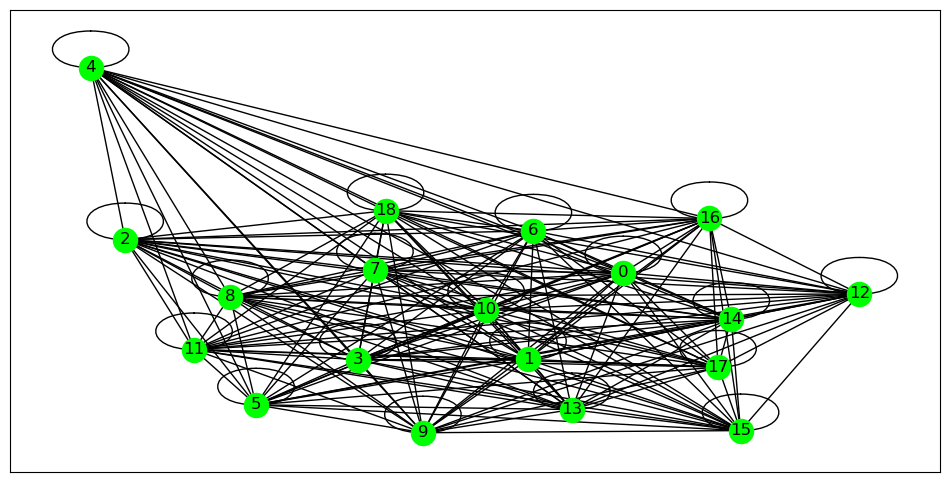

In [233]:
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(new_similarity_graph, node_color='lime')

In [234]:
# Calculate pagerank algorithm

scores = networkx.pagerank(new_similarity_graph)
ranked_sentences = sorted(
                    ((score, index) for index, score in scores.items()),
                    reverse=True)
ranked_sentences

[(0.06214517421505637, 10),
 (0.06096717357056135, 1),
 (0.06068771084568042, 13),
 (0.0590839205295943, 6),
 (0.058109753802328024, 17),
 (0.05741649317593389, 7),
 (0.05736798815554729, 0),
 (0.05710155122679847, 14),
 (0.05666878803125609, 11),
 (0.055309830944251875, 3),
 (0.05404555856726646, 18),
 (0.05290133883342002, 8),
 (0.052650301798782245, 9),
 (0.05185000265359986, 5),
 (0.05014732992519216, 16),
 (0.047879116877469916, 12),
 (0.04245076804477195, 15),
 (0.040533841907652496, 2),
 (0.022683356894836578, 4)]

In [235]:
scores = [s[0] for s in ranked_sentences]
thres = np.percentile(scores, 25)
print(thres)
top_sentence_indices = []
for item in ranked_sentences:
    if item[0] >= thres:
        top_sentence_indices.append(item[-1])

top_sentence_indices

0.05099866628939601


[10, 1, 13, 6, 17, 7, 0, 14, 11, 3, 18, 8, 9, 5]

In [236]:
# doc = nlp(sample)

# sentences = [sent.text for sent in doc.sents]
# sentences = corpus.copy()
sentences = sample.copy()
print("Before:")
print('\n\n'.join(sentences))
print()
print("After:")
sentences = np.array(sentences)[top_sentence_indices]
print('\n\n'.join(sentences))

Before:
I appreciate walked me. I appreciate walked through setting new device.

I could not resist upgrading. I could not resist offer amazing deals on phones.

staff really went mile.

I got good deal on old phone.

I m satisfied.

staff made.

I found needed what.

staff took time.

I appreciate were able.

I had great experience with program.

I made right purchase. I always leave store.

I had took too long. I had took way.

I bought phone.

staff seemed. staff gave incorrect information about phone plan.

I had to return faulty phone.

I very disorganized waited forever.

I felt pressured.

I had to call multiple times.

I felt overcharged.

After:
I made right purchase. I always leave store.

I could not resist upgrading. I could not resist offer amazing deals on phones.

staff seemed. staff gave incorrect information about phone plan.

I found needed what.

I had to call multiple times.

staff took time.

I appreciate walked me. I appreciate walked through setting new device.

